# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[23 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

In [2]:
df_creditcard = pd.read_csv('creditcard.csv')
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Isolation Forest

In [4]:
stan_scaler = StandardScaler()

X = df_creditcard.drop("Class", axis=1)
y = df_creditcard["Class"]

X_train_unscaled, x_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = stan_scaler.fit_transform(X_train_unscaled)
X_test = stan_scaler.transform(x_test_unscaled)


In [5]:
isol_forest = IsolationForest(contamination=0.01, random_state=42)

isol_forest.fit(X_train)

y_pred_iso = isol_forest.predict(X_test)

y_pred_iso = [1 if x == 1 else 0 for x in y_pred_iso]  # change -1 on 0 (anomalies)

X_train_scaled_2d = X_train[:, :2]  #  first two features to simplify visualisation
X_test_scaled_2d = X_test[:, :2]

In [6]:
print("Classification report for test data: ")
print(classification_report(y_test, y_pred_iso))

Classification report for test data: 
              precision    recall  f1-score   support

           0       0.90      0.01      0.02     56864
           1       0.00      0.37      0.00        98

    accuracy                           0.01     56962
   macro avg       0.45      0.19      0.01     56962
weighted avg       0.90      0.01      0.02     56962



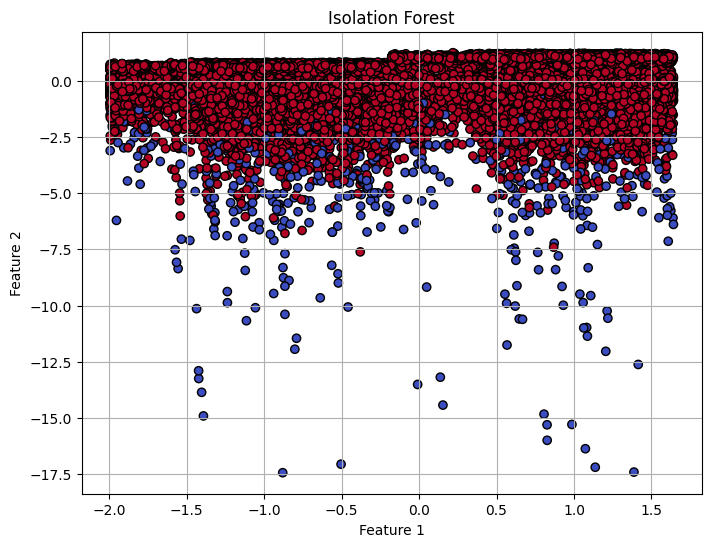

In [7]:
plt.figure(figsize=(8, 6))
plt.title("Isolation Forest")
plt.scatter(X_test_scaled_2d[:, 0], X_test_scaled_2d[:, 1], c=y_pred_iso, cmap='coolwarm', marker='o', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# One-Class SVM

In [8]:
one_class_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)

one_class_svm.fit(X_train)

y_pred_oc = one_class_svm.predict(X_test)

y_pred_oc = [1 if x == 1 else 0 for x in y_pred_oc] # -1 means an anomaly and  1 means a normal point

In [9]:
print("Classification report for test data: ")
print(classification_report(y_test, y_pred_oc))

Classification report for test data: 
              precision    recall  f1-score   support

           0       0.93      0.01      0.02     56864
           1       0.00      0.45      0.00        98

    accuracy                           0.01     56962
   macro avg       0.46      0.23      0.01     56962
weighted avg       0.92      0.01      0.02     56962



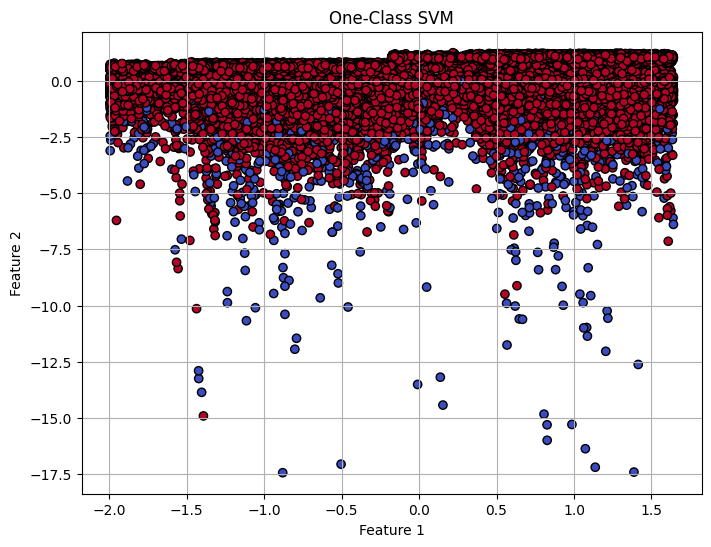

In [10]:
plt.figure(figsize=(8, 6))
plt.title("One-Class SVM")
plt.scatter(X_test_scaled_2d[:, 0], X_test_scaled_2d[:, 1], c=y_pred_oc, cmap='coolwarm', marker='o', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


# Local Outlier Factor (LOF)

In [15]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

y_pred_lof = lof.fit_predict(X_train)

y_pred_lof = np.where(y_pred_lof == 1, 0, 1)

In [16]:
print("Classification report for test data: ")
print(classification_report(y_train, y_pred_lof))

Classification report for test data: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.00      0.03      0.01       394

    accuracy                           0.99    227845
   macro avg       0.50      0.51      0.50    227845
weighted avg       1.00      0.99      0.99    227845



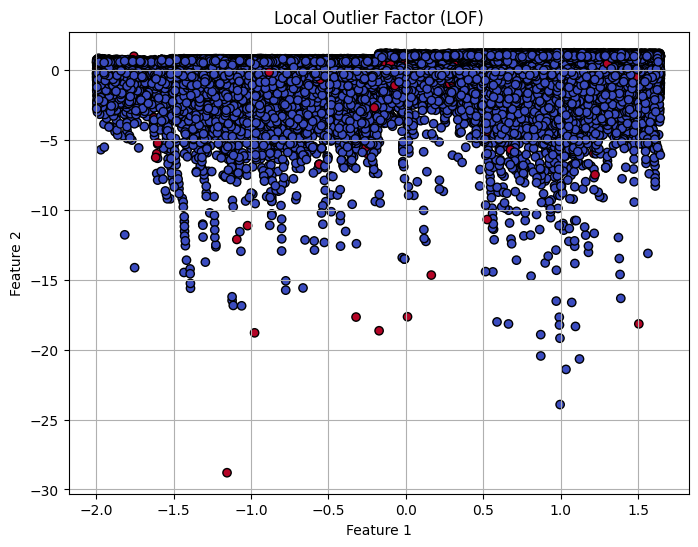

In [17]:
plt.figure(figsize=(8, 6))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_train_scaled_2d[:, 0], X_train_scaled_2d[:, 1], c=y_pred_lof, cmap='coolwarm', marker='o', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


Epoch [1/20], Loss: 0.4261
Epoch [2/20], Loss: 0.5004
Epoch [3/20], Loss: 0.4230
Epoch [4/20], Loss: 0.5694
Epoch [5/20], Loss: 0.3956
Epoch [6/20], Loss: 0.3961
Epoch [7/20], Loss: 0.6300
Epoch [8/20], Loss: 1.6098
Epoch [9/20], Loss: 0.4305
Epoch [10/20], Loss: 2.4875
Epoch [11/20], Loss: 0.6843
Epoch [12/20], Loss: 0.6291
Epoch [13/20], Loss: 0.3669
Epoch [14/20], Loss: 0.4253
Epoch [15/20], Loss: 0.5001
Epoch [16/20], Loss: 0.5320
Epoch [17/20], Loss: 0.3444
Epoch [18/20], Loss: 1.1689
Epoch [19/20], Loss: 0.4221
Epoch [20/20], Loss: 0.3118
              precision    recall  f1-score   support

      Normal       1.00      0.95      0.98     56864
     Anomaly       0.03      0.90      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962



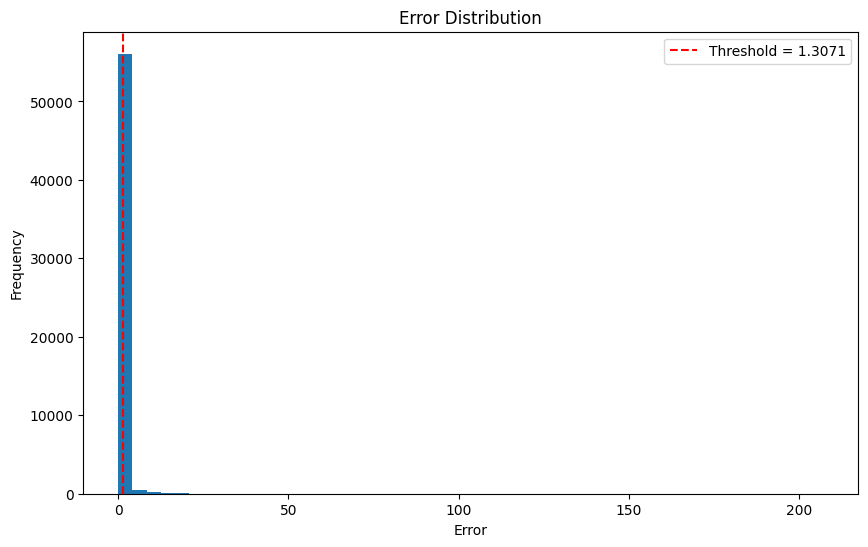

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_dim = X_train.shape[1]
model = Autoencoder(input_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
batch_size = 64

train_dataset = torch.utils.data.TensorDataset(X_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for data in train_loader:
        inputs = data[0]
        
        outputs = model(inputs)
        loss = criterion(outputs, inputs) 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    reconstructed = model(X_test_tensor)
    reconstruction_error = torch.mean((reconstructed - X_test_tensor) ** 2, dim=1)

threshold = np.percentile(reconstruction_error.numpy(), 95)
y_pred = (reconstruction_error.numpy() > threshold).astype(int)

print(classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly']))

plt.figure(figsize=(10,6))
plt.hist(reconstruction_error.numpy(), bins=50)
plt.axvline(threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Для виявлення аномалій у транзакціях за кредитними картками ми використали кілька підходів: **Isolation Forest, OneClassSVM, LocalOutlierFactor**, і глибокі нейронні мережі, а саме автоенкодери. Складавався **Classification report** за такими метриками **Precision**, **Recall**, **F1-score**.
 
ML алгоритми успішно класифікували нормальні транзакції **(клас "0")**, показавши високі значення Precision та Recall для цього класу. Однак точність для виявлення аномалій **(клас "1")** залишалася низькою, через що традиційні моделі виявилися менш ефективними для розпізнавання шахрайських операцій, незважаючи на загально високу точність.

Автоенкодери, на відміну від звичних ML методів, продемонстрували значно кращу здатність до виявлення аномалій. Після навчання на нормальних даних вони порівнюють вхідні та відновлені дані, виявляючи записи з великими помилками відновлення як потенційні аномалії. Це дозволило автоенкодерам відрізнити аномалії від звичайних клієнтів з вищою точністю.

Автоенкодер досяг найвищого показника F1 Score - **0.98**, що свідчить про його високу ефективність. Загалом, глибокі нейронні мережі мають великий потенціал у завданнях по виявленюю шахраїв, оскільки вони здатні навчатися складним закономірностям у даних і ефективніше виявляти приховані аномалії.